<a href="https://colab.research.google.com/github/AbdoAlkayal/Machine_Learning/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler


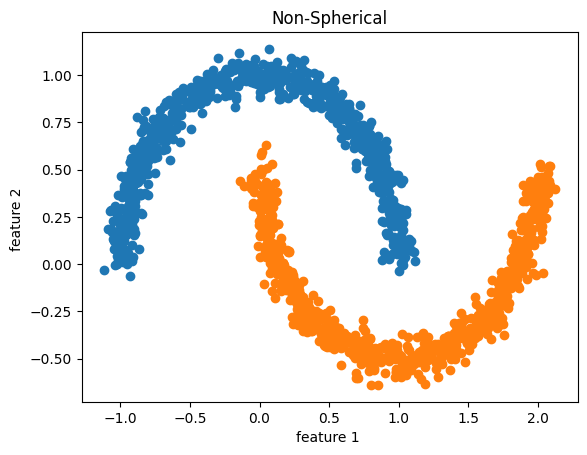

In [ ]:
x_moon,y_moon= make_moons(n_samples=1500, noise=0.05, random_state=42)
plt.scatter(x_moon[y_moon==0][:,0],x_moon[y_moon==0][:,1],label=0)
plt.scatter(x_moon[y_moon==1][:,0],x_moon[y_moon==1][:,1],label=1)
plt.title("Non-Spherical")
plt.xlabel("feature 1 ")
plt.ylabel("feature 2 ")
plt.show()

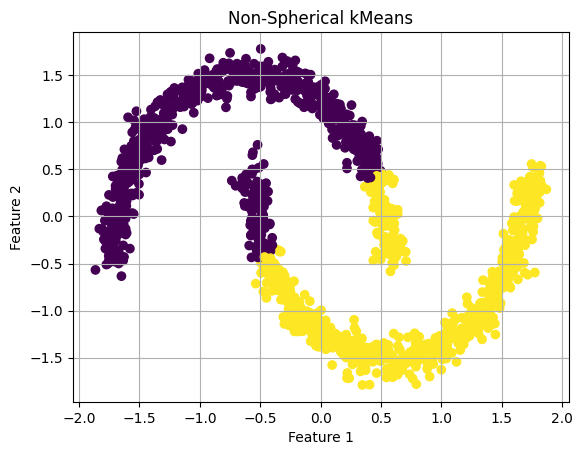

In [ ]:
scaler = StandardScaler()
x_moon_scaled = scaler.fit_transform(x_moon)
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans_labels = kmeans.fit_predict(x_moon_scaled)
plt.scatter(x_moon_scaled[:, 0], x_moon_scaled[:, 1], c=kmeans_labels)
plt.title("Non-Spherical kMeans")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

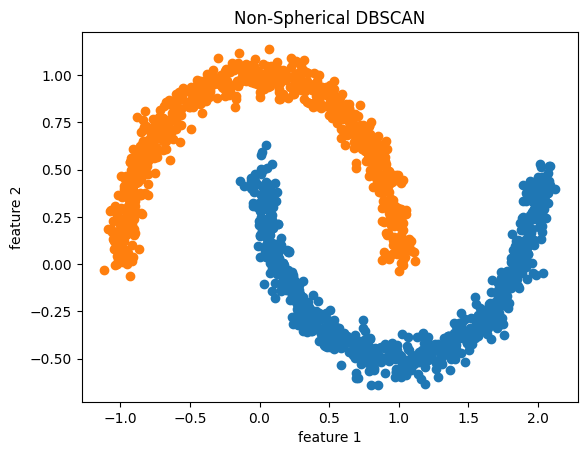

In [ ]:
model=DBSCAN(eps=0.2,min_samples=2)
model.fit(x_moon)
centers=model.labels_
plt.scatter(x_moon[centers==0][:,0],x_moon[centers==0][:,1],label=0)
plt.scatter(x_moon[centers==1][:,0],x_moon[centers==1][:,1],label=1)
plt.title("Non-Spherical DBSCAN")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()

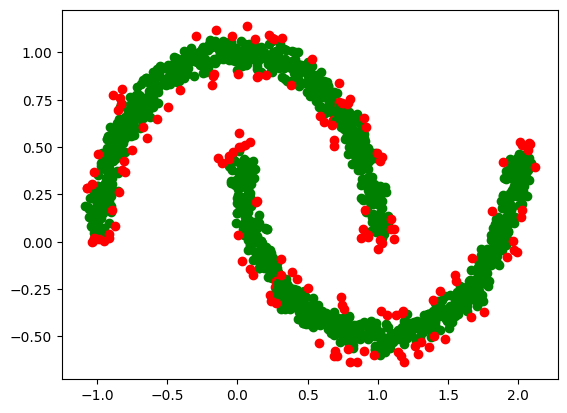

In [ ]:
model=KMeans(n_clusters=2,random_state=42)
model.fit(x_moon)
clusters=model.labels_
for cluster in np.unique(clusters):
  model=DBSCAN(eps=0.1,min_samples=20)
  cluster_points = x_moon[clusters == cluster]
  model.fit_predict(cluster_points)
  labels=model.labels_
  cores_index=np.zeros_like(labels,dtype=bool)
  cores_index[model.core_sample_indices_]=True
  borders_index = (~cores_index) & (labels != -1)
  plt.scatter(cluster_points[cores_index][:,0],cluster_points[cores_index][:,1],color="green",label="cores")
  plt.scatter(cluster_points[borders_index][:,0],cluster_points[borders_index][:,1],color="red",label="borders")
plt.show()

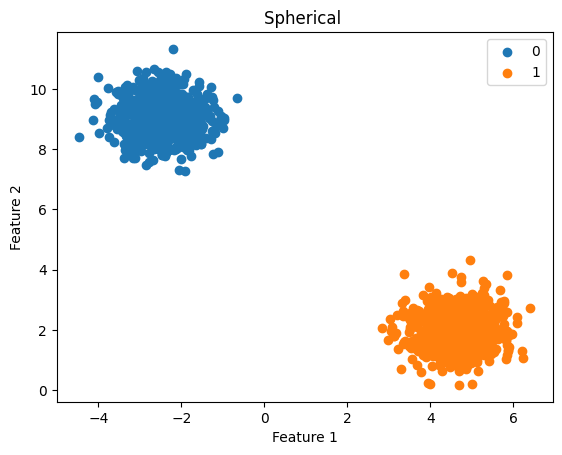

In [ ]:

x_blob, y_blob = make_blobs(n_samples=1500, centers=2, cluster_std=0.6, random_state=42)

plt.scatter(x_blob[y_blob==0][:, 0], x_blob[y_blob==0][:, 1], label='0')
plt.scatter(x_blob[y_blob==1][:, 0], x_blob[y_blob==1][:, 1], label='1')
plt.title("Spherical ")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

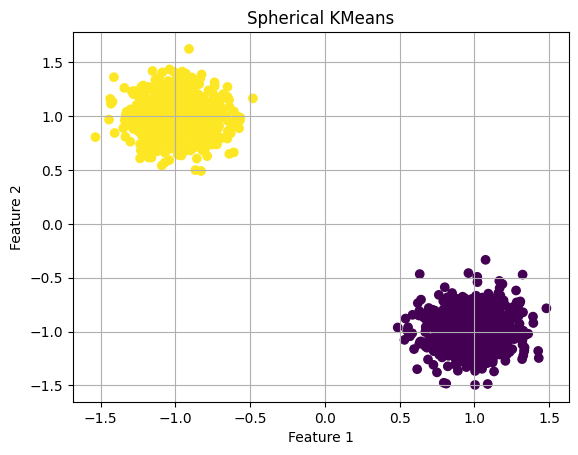

In [ ]:
scaler = StandardScaler()
x_blob_scaled = scaler.fit_transform(x_blob)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(x_blob_scaled)
plt.scatter(x_blob_scaled[:, 0], x_blob_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("Spherical KMeans")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

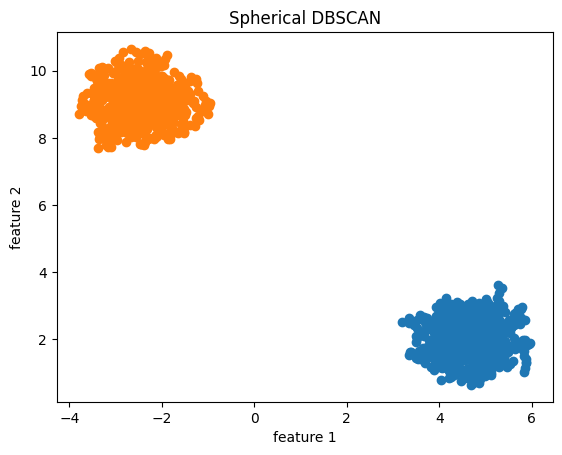

In [ ]:
model=DBSCAN(eps=0.2,min_samples=2)
model.fit(x_blob)
centers=model.labels_
plt.scatter(x_blob[centers==0][:,0],x_blob[centers==0][:,1],label=0)
plt.scatter(x_blob[centers==1][:,0],x_blob[centers==1][:,1],label=1)
plt.title("Spherical DBSCAN")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()

<ipython-input-9-d44b4f73cfd2>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


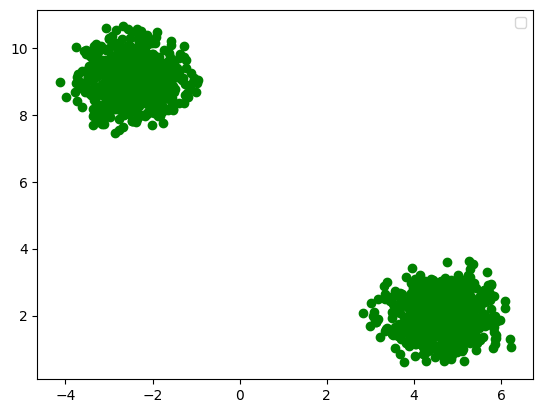

In [ ]:
model=DBSCAN(eps=0.5,min_samples=5)
model.fit(x_blob)
labels=model.labels_
cores_index=np.zeros_like(labels,dtype=bool)
cores_index[model.core_sample_indices_]=True
plt.scatter(x_blob[cores_index][:,0],x_blob[cores_index][:,1],color="green")
plt.legend()
plt.show()

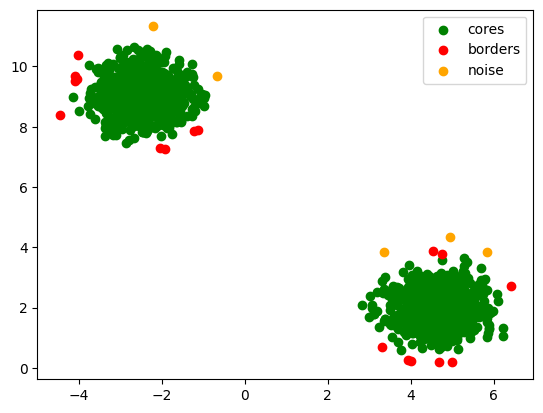

In [ ]:
model=DBSCAN(eps=0.5,min_samples=5)
model.fit(x_blob)
labels=model.labels_
cores_index=np.zeros_like(labels,dtype=bool)
cores_index[model.core_sample_indices_]=True
borders_index = (~cores_index) & (labels != -1)
plt.scatter(x_blob[cores_index][:,0],x_blob[cores_index][:,1],color="green",label="cores")
plt.scatter(x_blob[borders_index][:,0],x_blob[borders_index][:,1],color="red",label="borders")
plt.scatter(x_blob[labels==-1][:,0],x_blob[labels==-1][:,1],color="orange",label="noise")
plt.legend()
plt.show()

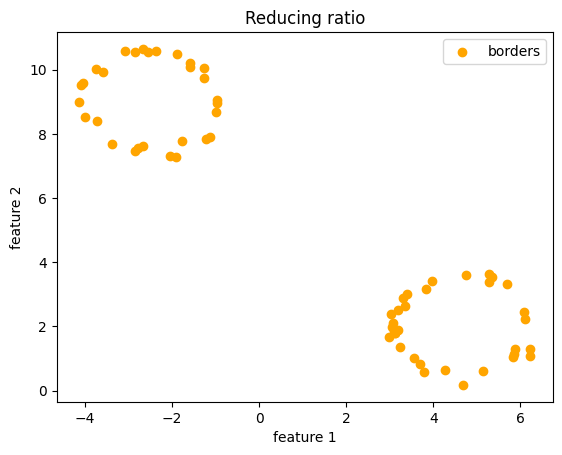

In [ ]:
model=DBSCAN(eps=0.5,min_samples=20)
model.fit(x_blob)
labels=model.labels_
cores_index=np.zeros_like(labels,dtype=bool)
cores_index[model.core_sample_indices_]=True
borders_index = (~cores_index) & (labels != -1)
Reduced=x_blob[borders_index][:,0:2]
plt.scatter(Reduced[:,0],Reduced[:,1],color="orange",label="borders")
plt.title("Reducing ratio")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend()
plt.show()

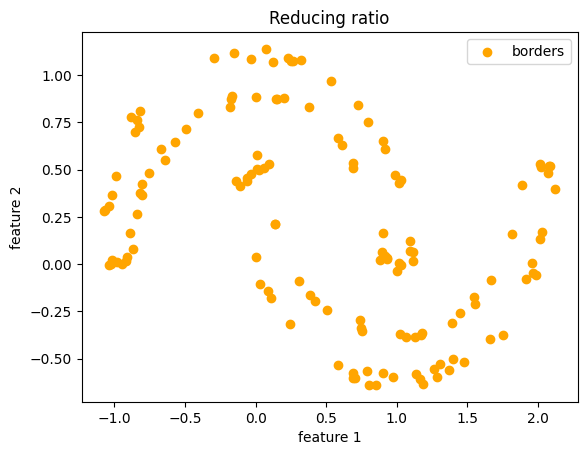

In [ ]:
model=DBSCAN(eps=0.1,min_samples=20)
model.fit(x_moon)
labels=model.labels_
cores_index=np.zeros_like(labels,dtype=bool)
cores_index[model.core_sample_indices_]=True
borders_index = (~cores_index) & (labels != -1)
Reduced=x_moon[borders_index][:,0:2]
plt.scatter(Reduced[:,0],Reduced[:,1],color="orange",label="borders")
plt.title("Reducing ratio")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend()
plt.show()

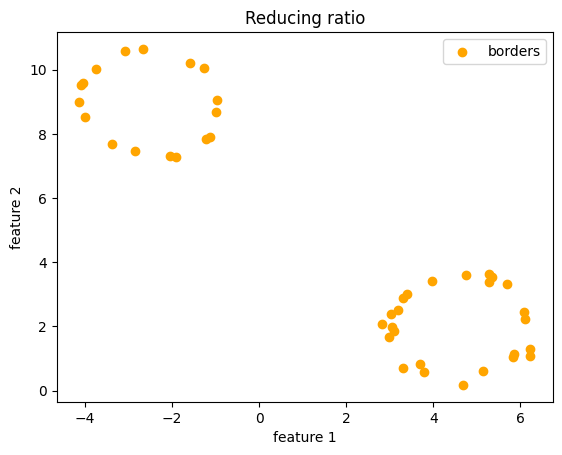

0.028


In [ ]:
model=DBSCAN(eps=0.5,min_samples=15)
model.fit(x_blob)
labels=model.labels_
cores_index=np.zeros_like(labels,dtype=bool)
cores_index[model.core_sample_indices_]=True
borders_index = (~cores_index) & (labels != -1)
Reduced=x_blob[borders_index][:,0:2]
plt.scatter(Reduced[:,0],Reduced[:,1],color="orange",label="borders")
plt.title("Reducing ratio")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend()
plt.show()
Reduced_ratio=Reduced.shape[0]/x_moon.shape[0]
print(Reduced_ratio)

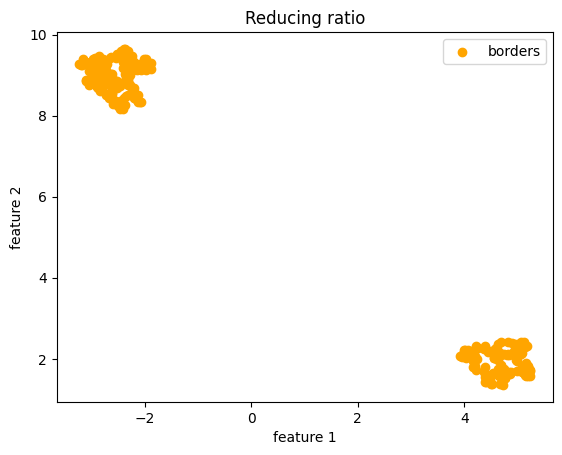

0.168


In [ ]:
model=DBSCAN(eps=0.1,min_samples=10)
model.fit(x_blob)
labels=model.labels_
cores_index=np.zeros_like(labels,dtype=bool)
cores_index[model.core_sample_indices_]=True
borders_index = (~cores_index) & (labels != -1)
Reduced=x_blob[borders_index][:,0:2]
plt.scatter(Reduced[:,0],Reduced[:,1],color="orange",label="borders")
plt.title("Reducing ratio")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend()
plt.show()
Reduced_ratio=Reduced.shape[0]/x_moon.shape[0]
print(Reduced_ratio)

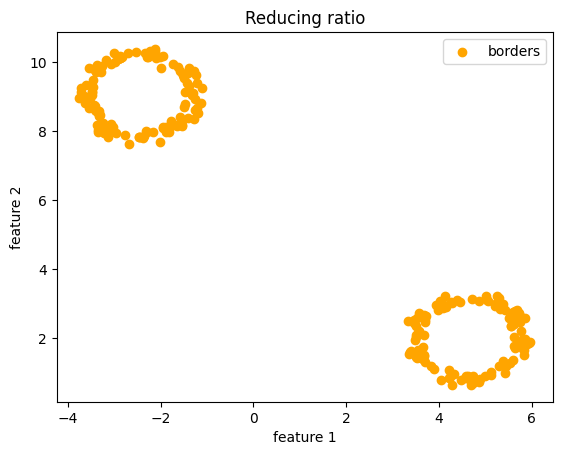

0.16


In [ ]:
model=DBSCAN(eps=0.4,min_samples=40)
model.fit(x_blob)
labels=model.labels_
cores_index=np.zeros_like(labels,dtype=bool)
cores_index[model.core_sample_indices_]=True
borders_index = (~cores_index) & (labels != -1)
Reduced=x_blob[borders_index][:,0:2]
plt.scatter(Reduced[:,0],Reduced[:,1],color="orange",label="borders")
plt.title("Reducing ratio")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend()
plt.show()
Reduced_ratio=Reduced.shape[0]/x_moon.shape[0]
print(Reduced_ratio)

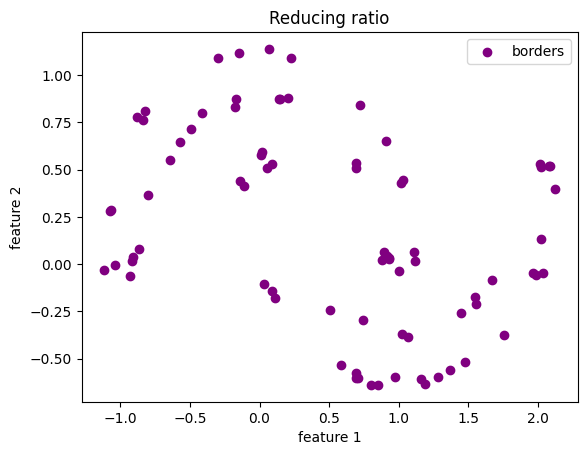

0.052


In [ ]:
model=DBSCAN(eps=0.1,min_samples=15)
model.fit(x_moon)
labels=model.labels_
cores_index=np.zeros_like(labels,dtype=bool)
cores_index[model.core_sample_indices_]=True
borders_index = (~cores_index) & (labels != -1)
Reduced=x_moon[borders_index][:,0:2]
plt.scatter(Reduced[:,0],Reduced[:,1],color="purple",label="borders")
plt.title("Reducing ratio")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend()
plt.show()
Reduced_ratio=Reduced.shape[0]/x_moon.shape[0]
print(Reduced_ratio)

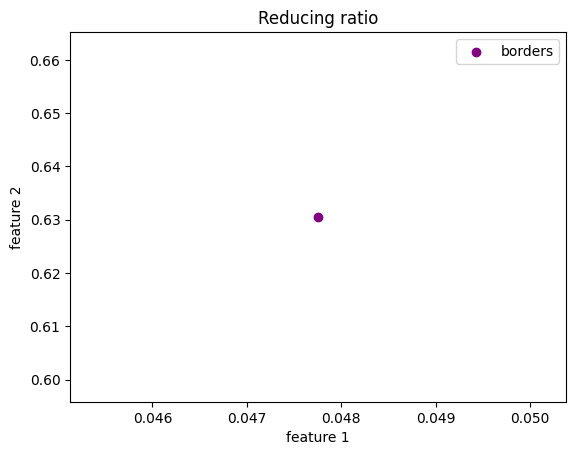

0.0006666666666666666


In [ ]:
model=DBSCAN(eps=0.2,min_samples=20)
model.fit(x_moon)
labels=model.labels_
cores_index=np.zeros_like(labels,dtype=bool)
cores_index[model.core_sample_indices_]=True
borders_index = (~cores_index) & (labels != -1)
Reduced=x_moon[borders_index][:,0:2]
plt.scatter(Reduced[:,0],Reduced[:,1],color="purple",label="borders")
plt.title("Reducing ratio")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend()
plt.show()
Reduced_ratio=Reduced.shape[0]/x_moon.shape[0]
print(Reduced_ratio)

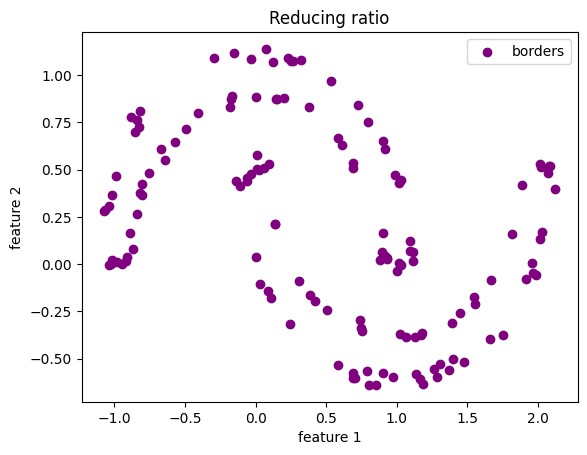

0.09266666666666666


In [ ]:
model=DBSCAN(eps=0.1,min_samples=20)
model.fit(x_moon)
labels=model.labels_
cores_index=np.zeros_like(labels,dtype=bool)
cores_index[model.core_sample_indices_]=True
borders_index = (~cores_index) & (labels != -1)
Reduced=x_moon[borders_index][:,0:2]
plt.scatter(Reduced[:,0],Reduced[:,1],color="purple",label="borders")
plt.title("Reducing ratio")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend()
plt.show()
Reduced_ratio=Reduced.shape[0]/x_moon.shape[0]
print(Reduced_ratio)